# Visualise and save the data from the .oct files

This code is adapted from the original file by Jos de Wit 2DScan_example.py


In [1]:
# Hier alle libraries importeren
from os import walk
import zipfile

import numpy as np
import matplotlib.pyplot as plt
from time import time
import sys
#sys.path.append(r'modules')
import ReadOCTfile
import DataProcessingOCT
import os

In [2]:
# hier een stuk code om te kijken naar de structuur van het te laden oct bestand
cur_dir = os.getcwd()
fname = "Default_0041_Mode2D.oct"
directory=ReadOCTfile.OCTfileOpen(fname)

# hier de zipfile inlezen:
zip = zipfile.ZipFile(fname)
print(zip.namelist())



['data\\Spectral0.data', 'data\\Spectral1.data', 'data\\Spectral10.data', 'data\\Spectral11.data', 'data\\Spectral2.data', 'data\\Spectral3.data', 'data\\Spectral4.data', 'data\\Spectral5.data', 'data\\Spectral6.data', 'data\\Spectral7.data', 'data\\Spectral8.data', 'data\\Spectral9.data', 'data\\ApodizationSpectrum.data', 'data\\Chirp.data', 'data\\OffsetErrors.data', 'data\\VideoImage.data', 'data\\Probe.ini', 'Header.xml']


In [3]:
# create the decrirp file

cur_dir = os.getcwd()
fname = "Default_0041_Mode2D.oct"
directory=ReadOCTfile.OCTfileOpen(fname)

with directory.open('data\Chirp.data') as myfile:
    #print(myfile.read())
    dechirp = np.fromstring(myfile.read(),np.float32)
    np.save("dechirp.npy",dechirp)


/var/folders/pr/6q_l_1zj24jd7vbk3hccwh3h0000gn/T/ipykernel_29827/4068204821.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dechirp = np.fromstring(myfile.read(),np.float32)


/Users/bramzijlstra/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/BachelorEindproject/Metingen/Interesante_metingen
It took  0.7856903076171875  s to load the raw data
It took  1.1727571487426758  s to process the data


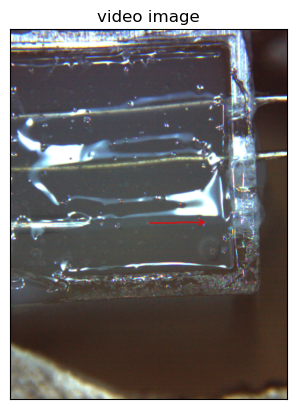

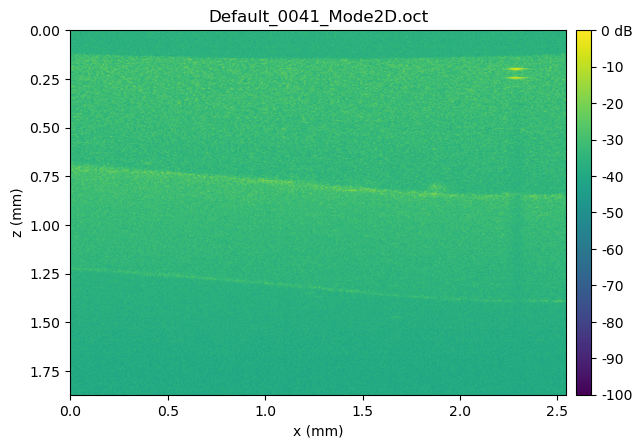

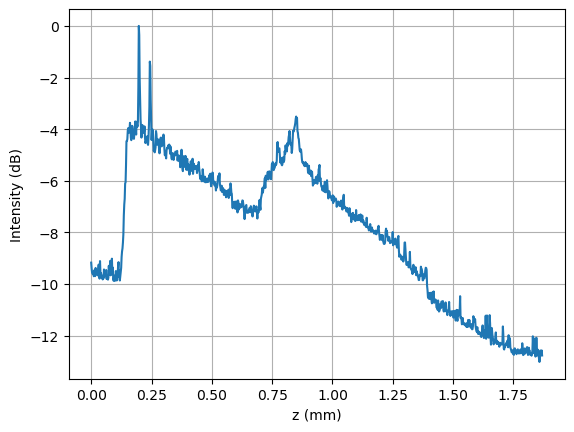

In [5]:
# adapted code from Jos de Wit:


plt.close('all')
# set file name and folder
fdir=r"data"
fname="Default_0041_Mode2D.oct"

# load data
t0=time()    

print(os.getcwd())
# het dechirpen werkt niet op deze manier dus dan maar wat anders.
#dechirp=np.fromfile('Chirp.data',np.float32)
dechirp = np.load('dechirp.npy')



# eerdere versie: directory=ReadOCTfile.OCTfileOpen(os.path.join(fdir,fname))
directory=ReadOCTfile.OCTfileOpen(fname)


header=ReadOCTfile.OCTreadHeader(directory)
Ascanav=int(header.Ocity.Acquisition.IntensityAveraging.AScans.string)
FOV=ReadOCTfile.OCTgetFOV(header)
rawdata,spectrum=ReadOCTfile.OCTgetRawData(directory,header,spectrumindex=0)
t1=time()
print('It took ',t1-t0,' s to load the raw data')
t0=time()
image=DataProcessingOCT.calc_Bscan(rawdata,spectrum,dechirp,Ascanav,apodization='hanning',filters='cuvet',objective='LK4')

t1=time()
print('It took ',t1-t0,' s to process the data')

#image = ReadOCTfile.OCTgetProcessedImage('fname')

#%% load and show the videoimage (RGB image from webcam)
# de originele: videoimage=ReadOCTfile.OCTgetVideoImage(os.path.join(fdir,fname))
videoimage=ReadOCTfile.OCTgetVideoImage(fname)
fig1=plt.figure(1)
videoim=plt.imshow(videoimage)
videoim.axes.set_title('video image')
videoim.axes.set_xticks([])
videoim.axes.set_yticks([])
#%% plot image on dB scale
fig1,ax=DataProcessingOCT.plot_Bscan_image(image,dBlevel=100,FOV=FOV,title=fname)
#%% plot average Ascan
plt.close(3)
plt.figure(3);
plt.plot(np.array(range(1024))*FOV[0]/1024*1e3,20*np.log10(np.mean(np.abs(image),axis=1)/np.max(np.mean(np.abs(image),axis=1))))
plt.grid(True)
plt.xlabel('z (mm)')
plt.ylabel('Intensity (dB)')
plt.show()

## Loading the data into numpy

In [5]:

# set the number of B-scans based on the measurement taken.
number_of_b_scans = 12

# here create a 3d array with the dimensions of the b_scans and the number of b_scans
a,b = image.shape
OCT_image_data = np.zeros([a,b,number_of_b_scans],dtype=complex)


In [6]:
# load the spectral data into a numpy array
for spectrum_index in range(number_of_b_scans):
    rawdata,spectrum=ReadOCTfile.OCTgetRawData(directory,header,spectrumindex=spectrum_index)
    OCT_image_data[:,:,spectrum_index] = DataProcessingOCT.calc_Bscan(rawdata,spectrum,dechirp,Ascanav,apodization='hanning',filters='cuvet',objective='LK4')
    

In [7]:
OCT_image_data.shape

(1024, 4000, 12)

In [8]:
min_a_scan = 1000
max_a_scan = 2024

OCT_image_data = OCT_image_data[:,min_a_scan:max_a_scan,:]
print(OCT_image_data.shape," Moet gelijk zijn aan 1024,1024,...")

(1024, 1024, 12)  Moet gelijk zijn aan 1024,1024,...


In [9]:
# save to a .npy file
#np.save("Meting_43_data.npy",OCT_image_data)

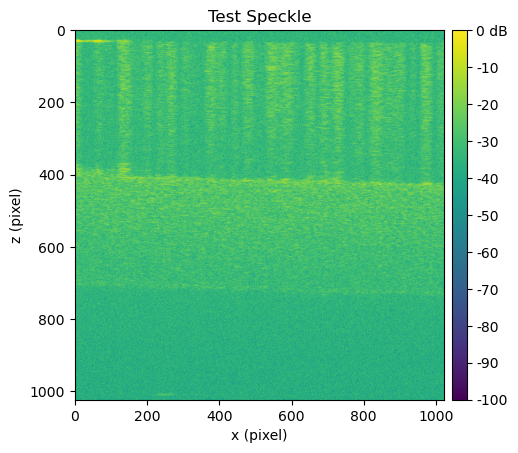

In [58]:
# plot the average
image_average = np.average(OCT_image_data,2)
#print(image_timeseries[:,:,0])


fig1,ax=DataProcessingOCT.plot_Bscan_image(image_average,dBlevel=100,title='Test Speckle')
plt.show()

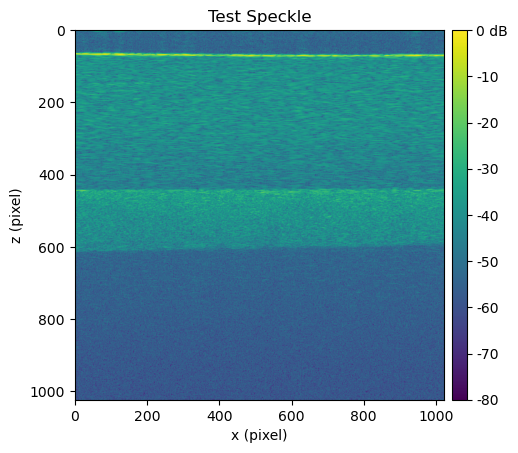

In [66]:
# hier een slice van de data plotten.
fig1,ax=DataProcessingOCT.plot_Bscan_image(OCT_image_data[:,:,0],dBlevel=80,title='Test Speckle')
plt.show()

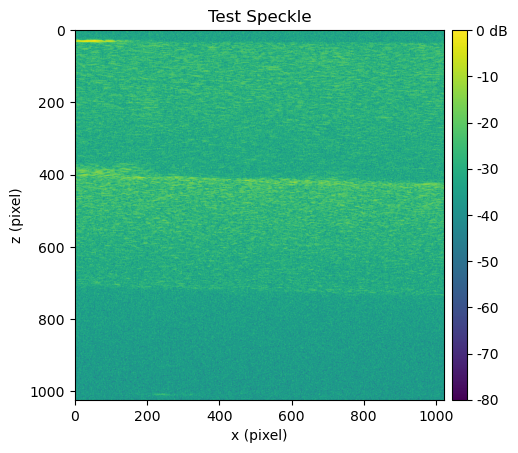

In [59]:
# plot a slice of the data
fig1,ax=DataProcessingOCT.plot_Bscan_image(OCT_image_data[:,:,0],dBlevel=80,title='Test Speckle')
plt.show()